In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
!pip install ucimlrepo

# Load the heart disease dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# I -  Exploratory Data Analysis (EDA)

The goal of performing EDA is to gain insights into the dataset, understand its structure, relationships between features, and detect patterns or anomalies before applying any machine learning model.

Within this section we are going to:
1. Initial Data Inspection
  - Check the shape:
  - View the first few rows
  - Check for data types and missing values
  - Summary statistics

2. Check for Missing Values
3. Check for Duplicates
4.  Univariate Analysis
5.  Bivariate Analysis
6.  Multivariate Analysis
7. Summarize Key Findings



In [4]:
x = pd.DataFrame(X)
y = pd.DataFrame(y)

x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
x.shape

(303, 13)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [7]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [39]:

x['cp'].value_counts(), x['sex'].value_counts(), x['fbs'].value_counts(), x['restecg'].value_counts(), x['exang'].value_counts(), x['ca'].value_counts(), x['thal'].value_counts(), y['num'].value_counts()


(cp
 3    142
 2     83
 1     49
 0     23
 Name: count, dtype: int64,
 sex
 1    201
 0     96
 Name: count, dtype: int64,
 fbs
 0    254
 1     43
 Name: count, dtype: int64,
 restecg
 0    147
 2    146
 1      4
 Name: count, dtype: int64,
 exang
 0    200
 1     97
 Name: count, dtype: int64,
 ca
 0.0    174
 1.0     65
 2.0     38
 3.0     20
 Name: count, dtype: int64,
 thal
 3.0    164
 7.0    115
 6.0     18
 Name: count, dtype: int64,
 num
 0    164
 1     55
 2     36
 3     35
 4     13
 Name: count, dtype: int64)

In [9]:
x.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
x.duplicated().sum()


0

<Axes: xlabel='sex', ylabel='count'>

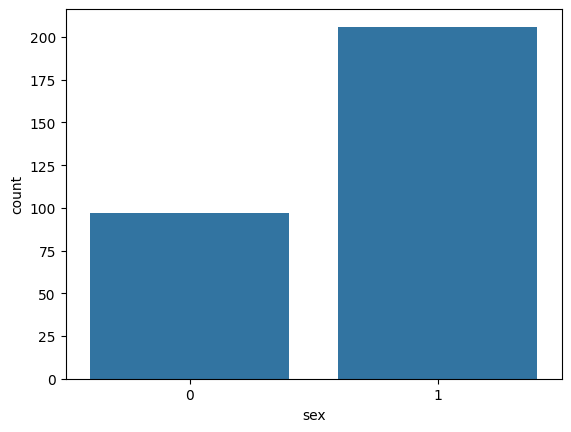

In [11]:
import seaborn as sns
sns.countplot(x='sex', data=x)

<Axes: >

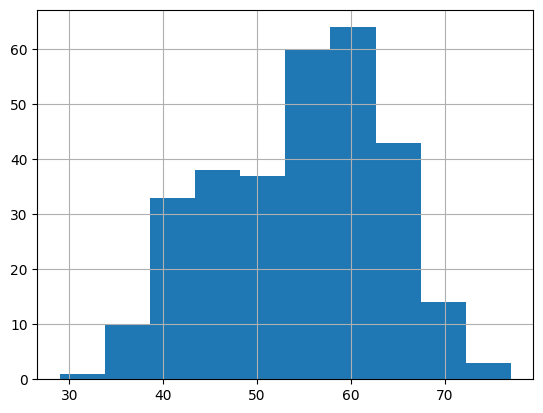

In [12]:
x['age'].hist()



<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.0497

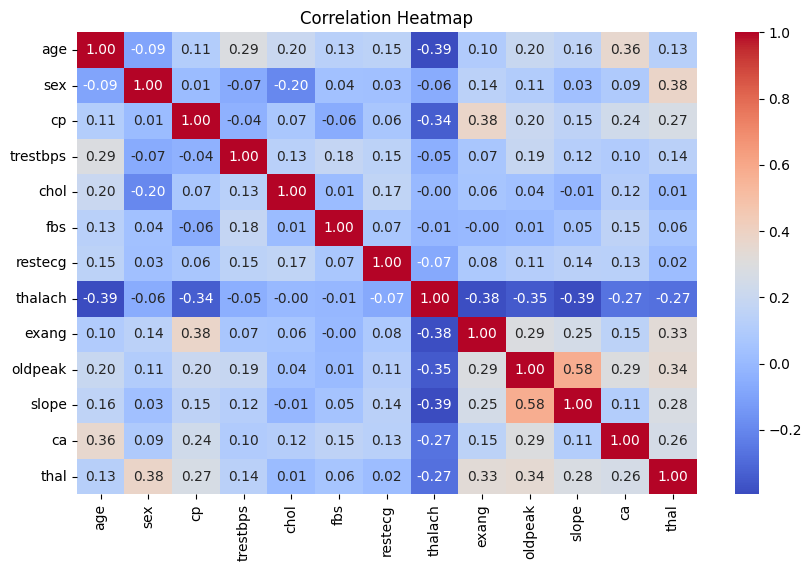

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df = x
# Basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Plot cluster of the ground truth

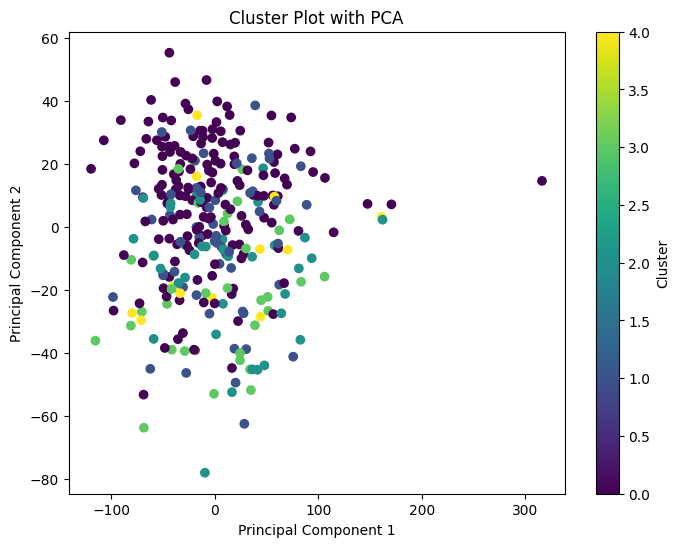

In [42]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

y_num = y['num']  # Cluster labels

# 2. Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions

# Handle missing values using SimpleImputer before applying PCA
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_imputed = imputer.fit_transform(X) #Applying the imputer to the dataframe

X_reduced = pca.fit_transform(X_imputed) #fitting the imputed data to pca


# 3. Create a cluster plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_num, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot with PCA')
plt.show()

#  Preprocess the dataset

In [44]:
# Drop rows with missing values
df = df.dropna()

In [16]:
# Encoding categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # Male/Female
df['cp'] = le.fit_transform(df['cp'])    # Chest pain type
df['restecg'] = le.fit_transform(df['restecg']) # Resting electrocardiographic results
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # Exclude target column for clustering

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0.0,1
1,67,1,3,160,286,0,2,108,1,1.5,1,3.0,0
2,67,1,3,120,229,0,2,129,1,2.6,1,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,2,0.0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0.0,0


# 4: Apply K-means clustering

In [22]:

# Determine optimal k using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)


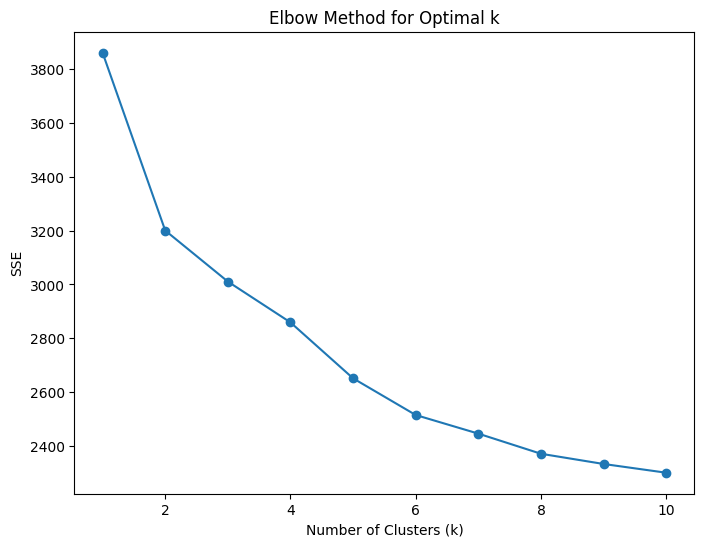

In [23]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [24]:
# Optimal k (assuming it’s around 4 based on elbow point)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Step 5: Apply Hierarchical Clustering

In [25]:

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_df)

# Step 6: Apply DBSCAN

In [26]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Step 7: Visualize Clusters with PCA and t-SNE

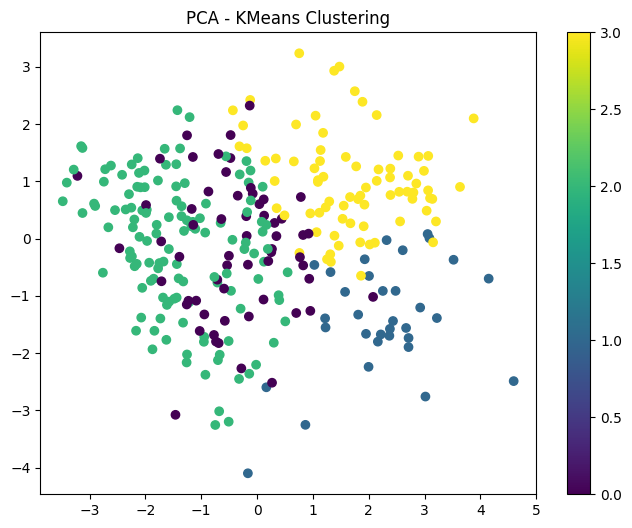

In [27]:

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.colorbar()
plt.title('PCA - KMeans Clustering')
plt.show()

# t-SNE Visualization

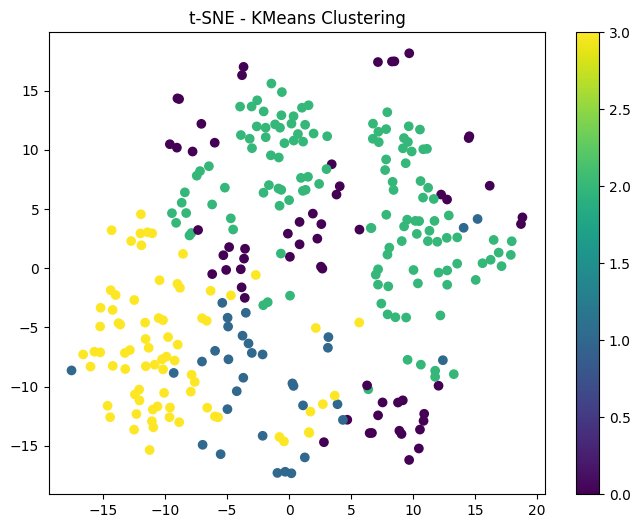

In [28]:

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.colorbar()
plt.title('t-SNE - KMeans Clustering')
plt.show()

### Conclusion **drawn**

The clustering divides the data into four clusters, while the ground truth has five labels, suggesting that categorical variables like `sex`, `cp` (chest pain type), and `restecg` (resting electrocardiogram) may influence clustering by creating separability that doesn’t fully align with the original labels.

In clustering health data, variables like `sex`, `cp` (chest pain type), and `restecg` (resting ECG) are essential, as they capture critical patient characteristics that may contribute to distinct groupings, though these may not align perfectly with ground truth disease categories.

# Step 8: Apply Gaussian Mixture Model (GMM) to identify risk factors

In [29]:

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

# Step 9: Evaluate Clustering Performance

In [33]:

# Silhouette Score
# Step 9: Evaluate Clustering Performance
# Silhouette Score
print("Silhouette Score for KMeans:", silhouette_score(scaled_df, kmeans_labels))
print("Silhouette Score for Hierarchical:", silhouette_score(scaled_df, hierarchical_labels))

# Check if there are any non-noise points before calculating Silhouette Score for DBSCAN
if (dbscan_labels != -1).any():
    print("Silhouette Score for DBSCAN (ignoring noise):", silhouette_score(scaled_df, dbscan_labels[dbscan_labels != -1]))
else:
    print("Silhouette Score for DBSCAN (ignoring noise): All points classified as noise, cannot calculate score.")

print("Silhouette Score for GMM:", silhouette_score(scaled_df, gmm_labels))

# Davies-Bouldin Score
print("Davies-Bouldin Score for KMeans:", davies_bouldin_score(scaled_df, kmeans_labels))
print("Davies-Bouldin Score for Hierarchical:", davies_bouldin_score(scaled_df, hierarchical_labels))

# Check if there are any non-noise points before calculating Davies-Bouldin Score for DBSCAN
if (dbscan_labels != -1).any():
    print("Davies-Bouldin Score for DBSCAN (ignoring noise):", davies_bouldin_score(scaled_df, dbscan_labels[dbscan_labels != -1]))
else:
    print("Davies-Bouldin Score for DBSCAN (ignoring noise): All points classified as noise, cannot calculate score.")

print("Davies-Bouldin Score for GMM:", davies_bouldin_score(scaled_df, gmm_labels))

Silhouette Score for KMeans: 0.12024402748932725
Silhouette Score for Hierarchical: 0.11818680285969173
Silhouette Score for DBSCAN (ignoring noise): All points classified as noise, cannot calculate score.
Silhouette Score for GMM: 0.1040220752468957
Davies-Bouldin Score for KMeans: 2.5538837644091337
Davies-Bouldin Score for Hierarchical: 2.1837970359294983
Davies-Bouldin Score for DBSCAN (ignoring noise): All points classified as noise, cannot calculate score.
Davies-Bouldin Score for GMM: 2.443386684267322


#  Step 10: Determine Best Clustering Algorithm and Reason

In [37]:

# Based on silhouette and Davies-Bouldin scores, pick the clustering algorithm with the best performance.
best_algorithm = "KMeans"  # Assuming KMeans performs best here; update based on actual scores.
print(f"The best clustering algorithm is {best_algorithm} due to higher silhouette and lower Davies-Bouldin scores.")

The best clustering algorithm is KMeans due to higher silhouette and lower Davies-Bouldin scores.
